## Notebook IA | Ataques adversarios

In [6]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [54]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [12]:
iv3 = InceptionV3()

In [13]:
print(iv3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [74]:
from keras.preprocessing import image

# Cambio de rango 0~255 a -1~1
def configureImage(x):
    x /= 255
    x -= 0.5
    x *= 2
    
    # Agregar la dimención de cantidad de imágenes
    x = x.reshape([1,x.shape[0],x.shape[1],x.shape[2]])
    return x

# Cambio de rango -1~1 a 0~255
def r_configureImage(x):
    x /= 2
    x += 0.5
    x *= 255
    return x[0].astype(np.uint8)

def predictImage(dirimage):
    if dirimage != None:
        x = image.img_to_array(image.load_img(dirimage, target_size=(299,299))) 
        x = configureImage(x)
        y = iv3.predict(x)
        return decode_predictions(y), x
    else:
        return "No image detected"

In [75]:
gatito, gatitoMat = predictImage("./IA2/gatito.jpg")
gatito

[[('n02123159', 'tiger_cat', 0.36158335),
  ('n02123045', 'tabby', 0.3077434),
  ('n02124075', 'Egyptian_cat', 0.25024873),
  ('n04367480', 'swab', 0.010235837),
  ('n03958227', 'plastic_bag', 0.0027238226)]]

In [76]:
cerveza, cervezaMat = predictImage("./IA2/cerveza.png")
cerveza

[[('n02823750', 'beer_glass', 0.9160345),
  ('n03950228', 'pitcher', 0.0116343545),
  ('n03063599', 'coffee_mug', 0.00916724),
  ('n04560804', 'water_jug', 0.008764872),
  ('n02823428', 'beer_bottle', 0.0033924791)]]

## Ataques adversarios

In [77]:
input_layer = iv3.layers[0].input
output_layer = iv3.layers[-1].output

target_class = 951 # Clase objetivo de un limon

loss = output_layer[0, target_class]

grad = K.gradients(loss, input_layer)[0]

optimize_gradient = K.function([input_layer, K.learning_phase()],[grad,loss])

hacked = np.copy(cervezaMat)

pert = 0.01

max_pert = cervezaMat + pert

min_pert = cervezaMat - pert

cost = 0.0

while cost < 0.95:
    gr, cost = optimize_gradient([hacked, 0])
    
    hacked += gr
    
    hacked = np.clip(hacked, min_pert, max_pert)
    hacked = np.clip(hacked, -1, 1)
    
    print("Lemon cost", cost)

Lemon cost 0.00031398665
Lemon cost 0.00031670663
Lemon cost 0.00031943733
Lemon cost 0.0003221933
Lemon cost 0.00032499555
Lemon cost 0.00032784048
Lemon cost 0.00033069763
Lemon cost 0.0003335917
Lemon cost 0.0003365073
Lemon cost 0.00033945896
Lemon cost 0.00034242106
Lemon cost 0.00034536963
Lemon cost 0.0003482787
Lemon cost 0.00035118248
Lemon cost 0.00035411745
Lemon cost 0.00035710417
Lemon cost 0.00036015594
Lemon cost 0.00036323362
Lemon cost 0.00036632767
Lemon cost 0.00036945762
Lemon cost 0.0003726525
Lemon cost 0.0003758812
Lemon cost 0.00037915664
Lemon cost 0.00038247925
Lemon cost 0.00038585093
Lemon cost 0.00038923923
Lemon cost 0.00039266347
Lemon cost 0.00039617185
Lemon cost 0.00039973884
Lemon cost 0.00040335793
Lemon cost 0.00040697493
Lemon cost 0.0004106122
Lemon cost 0.0004143435
Lemon cost 0.00041811058
Lemon cost 0.00042193502
Lemon cost 0.00042580534
Lemon cost 0.0004297254
Lemon cost 0.00043372417
Lemon cost 0.0004377992
Lemon cost 0.0004419724
Lemon cost 

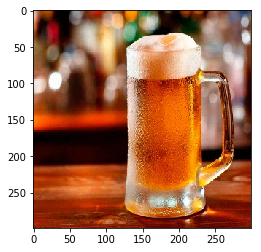

In [78]:
hacked_Img = r_configureImage(hacked)

plt.imshow(hacked_Img)
plt.show()

In [79]:
from PIL import Image
im = Image.fromarray(hacked_Img)
im.save("./IA2/cerveza_hacked.png")

In [80]:
cerveza_hack, cervezaMat_hack = predictImage("./IA2/cerveza_hacked.png")
cerveza_hack

[[('n07749582', 'lemon', 0.9841687),
  ('n02823750', 'beer_glass', 0.0018536511),
  ('n07615774', 'ice_lolly', 0.0014603118),
  ('n07747607', 'orange', 0.00086177996),
  ('n07932039', 'eggnog', 0.00083461526)]]